# Imports
Importing pandas and data files

In [1]:
import os, numpy as np, pandas as pd
file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
# Number of rows
print("no. of rows = ",data.shape[0],"\n")

# Column names
print("the columns are",data.columns.tolist(),"\n")

# Data types
print(data.dtypes)

no. of rows =  210 

the columns are ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry coefficient', ' Length of kernel groove', 'Label'] 

Area                        float64
Perimeter                   float64
Compactness                 float64
Length of Kernel            float64
Width of Kernel             float64
Asymmetry coefficient       float64
 Length of kernel groove    float64
Label                         int64
dtype: object


# EDA
Commence the EDA

In [3]:
data['Compactness'].describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: Compactness, dtype: float64

# Plotting
Do the plots


[Text(0,0.5,'Perimeter'), Text(0.5,0,'Area'), Text(0.5,1,'Area vs Perimeter')]

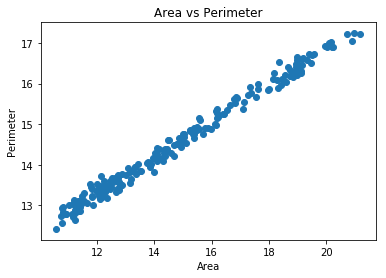

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data['Area'], data['Perimeter'])

# Label the axes
ax.set(xlabel='Area',
       ylabel='Perimeter',
       title='Area vs Perimeter')

We can say Area and Perimeter have a proportional relationship

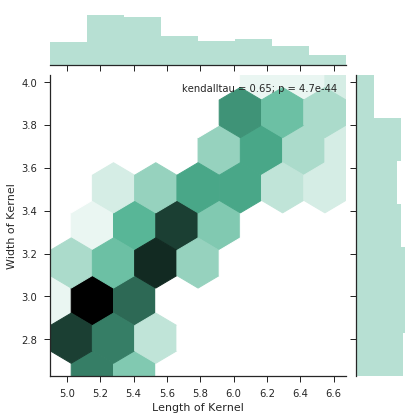

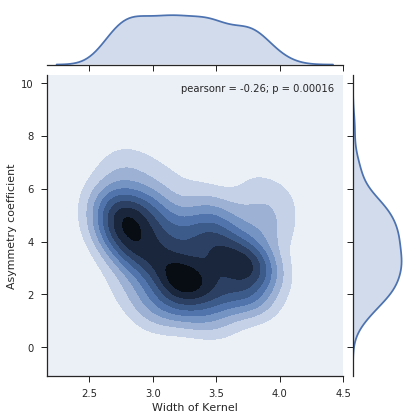

In [5]:
import seaborn as sns
from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(data['Length of Kernel'], data['Width of Kernel'], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(x="Width of Kernel", y="Asymmetry coefficient", data=data, kind="kde");

https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

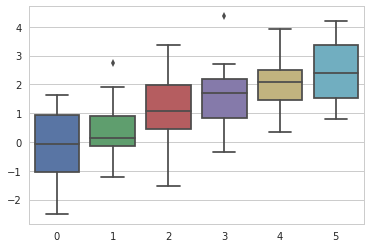

In [6]:
sns.set_style("whitegrid")
databp = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=databp);   ####EDA

In [7]:
sns.set(style="ticks")
#scatter_data = data
#df = pd.DataFrame(data,index=data[:,0]),
#sns.pairplot(data,hue='h')

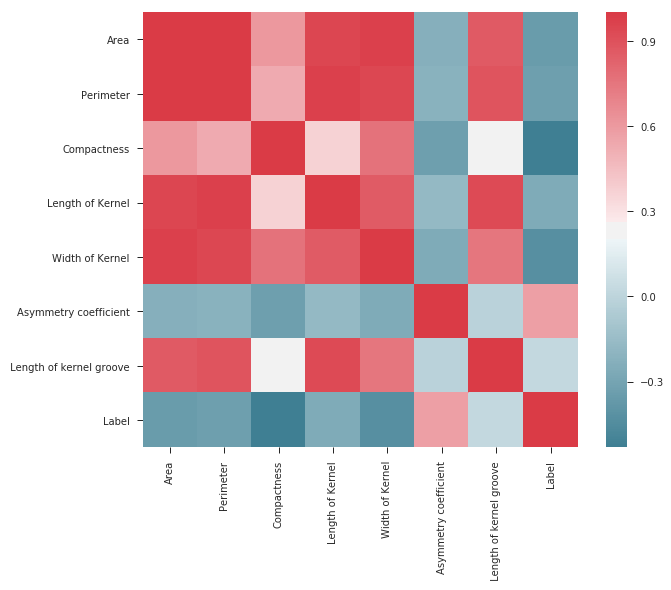

In [8]:
df = data
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

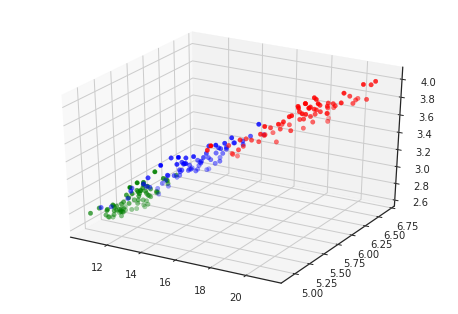

In [9]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

one_data = data[data.Label == 1]
two_data = data[data.Label == 2]
three_data = data[data.Label == 3]

d1 = list(one_data.get("Area"))
d2 = list(one_data.get("Length of Kernel"))
d3 = list(one_data.get("Width of Kernel"))

d4 = list(two_data.get("Area"))
d5 = list(two_data.get("Length of Kernel"))
d6 = list(two_data.get("Width of Kernel"))

d7 = list(three_data.get("Area"))
d8 = list(three_data.get("Length of Kernel"))
d9 = list(three_data.get("Width of Kernel"))

ax.scatter(d1,d2,d3,c='b')
ax.scatter(d4,d5,d6,c='r')
ax.scatter(d7,d8,d9,c='g')
pyplot.show()